In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def lambda_radiation(epsilon, epsilon_r, T, d, k_solid):
    T = T + 273
    sigma = 5.67E-8 # W m−2 K−4
    B = 1.25 * ((1.-epsilon)/epsilon)**(10./9)
    Lambda = k_solid / (4* sigma * T**3 * d)
    lambda_e1 = (1-sqrt(1-epsilon))*epsilon
    lambda_e2 = (sqrt(1-epsilon))/(2./epsilon_r - 1.)
    lambda_e3 = (B+1.)/B
    lambda_e4 = (1/(1+1/((2./epsilon_r - 1.)*Lambda)))
    lambda_e = (lambda_e1 + lambda_e2*lambda_e3*lambda_e4)*4.*sigma*T**3*d
    return lambda_e

def lambda_fluid(epsilon, lambda_r):
    B = 1.25 * ((1-epsilon)/epsilon)**(10./9)
    lambda_f1 = (1-sqrt(1-epsilon))
    lambda_f2 = (2*sqrt(1-epsilon))/(1-lambda_r*B)
    lambda_f3 = (((1-lambda_r)*B)/(1-lambda_r*B)**2)*log(1./(lambda_r*B)) - (B+1.)/2. - (B-1.)/(1.-lambda_r*B)
    lambda_f = (lambda_f1 + lambda_f2*lambda_f3)
    return lambda_f

def lambda_contact(d, p):
    R = d/2     
    # these are for SC, change for random?
    S = 1
    S_F = 1
    N_A = 1/(4.*(d/2)**2.)
    N_L = 1/(2.*(d/2))
    #------------------
    
    E_s = 120.e9
    nu_s = 0.24
    f_s = p*S_F/N_A
    #solid
    lambda_s1 = ((3*(1-nu_s**2))/(4*E_s) * f_s*R)**(1./3)
    lambda_s2 = (1./(0.531*S))*(N_A/N_L)
    lambda_s = lambda_s1*lambda_s2
    return lambda_s

In [13]:
T = linspace(100,800,100)
k_gas = 0.0025 * (T+273)**0.72 # W/mK

# Equations for graphite

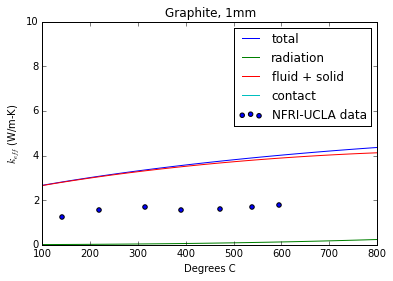

In [14]:
d = 0.001 #m

T_fit = np.array([25,100,200,300,400,500,1000])
k_s_fit = np.array([110,100,92,85,79,75,50])
z = np.polyfit(T_fit, k_s_fit, 1)
k_s = np.poly1d(z)


k_solid = k_s(T)
lambda_r = k_gas / k_solid
kappa = 1/lambda_r

k_exp = [1.255, 1.544, 1.675, 1.5382, 1.624, 1.676, 1.781]
T_exp = [140.95, 217.76, 314.85, 390.93, 471.01, 538.42, 594.76]

epsilon = 0.38
epsilon_r = 0.8

k_radiation = lambda_radiation(epsilon, epsilon_r, T, d, k_solid)
k_fluid     = lambda_fluid(epsilon, lambda_r)*k_gas
k_contact   = lambda_contact(d, 1.e2)*k_gas

k_tot = k_radiation + k_fluid + k_contact
figure(1)
title('Graphite, 1mm')
# plot(T, k_gas, label='Helium')
# plot(T, k_solid, label="Graphite")
scatter(T_exp, k_exp, label='NFRI-UCLA data')
plot(T, k_tot,label='total')
plot(T, k_radiation,label='radiation')
plot(T, k_fluid,label='fluid + solid')
plot(T, k_contact,label='contact')
xlim([min(T),max(T)])
ylim([0, 10])
xlabel('Degrees C')
ylabel(r"$k_{eff}$ (W/m-K)")
legend(loc='best')

In [15]:
k_gas

array([ 0.17765211,  0.18007042,  0.18247616,  0.18486964,  0.18725112,
        0.18962088,  0.19197918,  0.19432627,  0.19666238,  0.19898775,
        0.2013026 ,  0.20360714,  0.20590159,  0.20818613,  0.21046096,
        0.21272628,  0.21498225,  0.21722905,  0.21946685,  0.22169581,
        0.22391609,  0.22612784,  0.22833121,  0.23052634,  0.23271337,
        0.23489244,  0.23706367,  0.2392272 ,  0.24138315,  0.24353163,
        0.24567277,  0.24780667,  0.24993345,  0.25205322,  0.25416608,
        0.25627212,  0.25837146,  0.26046419,  0.2625504 ,  0.26463018,
        0.26670362,  0.26877081,  0.27083184,  0.27288679,  0.27493574,
        0.27697876,  0.27901594,  0.28104736,  0.28307308,  0.28509317,
        0.28710772,  0.28911678,  0.29112043,  0.29311873,  0.29511175,
        0.29709955,  0.29908218,  0.30105972,  0.30303222,  0.30499974,
        0.30696234,  0.30892007,  0.31087298,  0.31282114,  0.31476459,
        0.31670338,  0.31863757,  0.32056721,  0.32249233,  0.32

# Apply to copper spheres

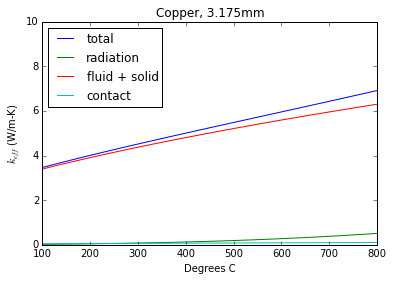

In [18]:
d = 0.003175 #m

k_solid = ones(len(T))*350 # W/mK
lambda_r = k_gas / k_solid

epsilon = 0.38
epsilon_r = 0.6

k_radiation = lambda_radiation(epsilon, epsilon_r, T, d, k_solid)
k_fluid     = lambda_fluid(epsilon, lambda_r)*k_gas
k_contact   = lambda_contact(d, 1.e9)*k_gas

k_tot = k_radiation + k_fluid + k_contact

figure(2)
title('Copper, 3.175mm')
plot(T, k_tot,label='total')
plot(T, k_radiation,label='radiation')
plot(T, k_fluid,label='fluid + solid')
plot(T, k_contact,label='contact')
xlabel('Degrees C')
ylabel(r"$k_{eff}$ (W/m-K)")
xlim([min(T),max(T)])
ylim([0, 10])
legend(loc='best')

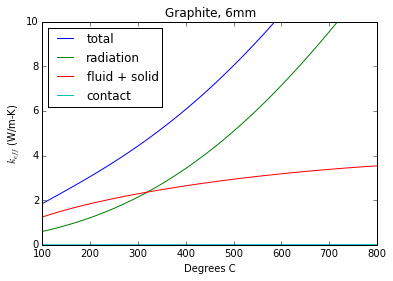

In [12]:
d = 0.06 #m
T_fit = np.array([25,100,200,300,400,500,1000])
k_s_fit = np.array([110,100,92,85,79,75,50])
z = np.polyfit(T_fit, k_s_fit, 1)
k_s = np.poly1d(z)
k_solid = k_s(T)


lambda_r = k_gas / k_solid



epsilon = 0.38
epsilon_r = 0.8

k_radiation = lambda_radiation(epsilon, epsilon_r, T, d, k_solid)
k_fluid     = lambda_fluid(epsilon, lambda_r)*k_gas
k_contact   = lambda_contact(d, 1.e6)*k_gas

k_tot = k_radiation + k_fluid + k_contact

figure(3)
title('Graphite, 6mm')

plot(T, k_tot,label='total')
plot(T, k_radiation,label='radiation')
plot(T, k_fluid,label='fluid + solid')
plot(T, k_contact,label='contact')
xlim([min(T),max(T)])
ylim([0, 10])
xlabel('Degrees C')
ylabel(r"$k_{eff}$ (W/m-K)")
legend(loc='best')


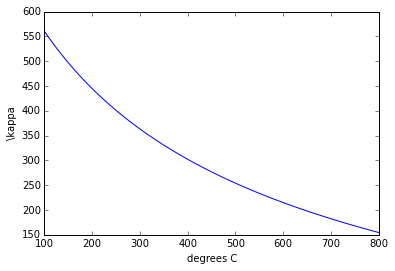

In [16]:
figure(4)
plot(T, kappa, label=r"\kappa")
ylabel(r"\kappa")
xlabel('degrees C')